### Team Name: 
FAM


### Team Members:

Asmaa Alrefae, Faisal Al shuraym, Mansour Aljuaid

## Problem Statement 

Predict the sales price for each house. For each Id in the test set, predict the value of the SalePrice variable. 

Kernel link: https://www.kaggle.com/faisalalshuraym/kernel3545679489/edit

# The Kaggle Score for this Model is 0.122

In [150]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [151]:
#Now let's import and put the train and test datasets in  pandas dataframe
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [152]:
##display the first five rows of the train dataset.
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [153]:
##display the first five rows of the test dataset.
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [154]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 



 mu = 180921.20 and sigma = 79415.29



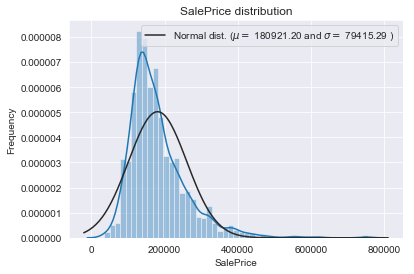

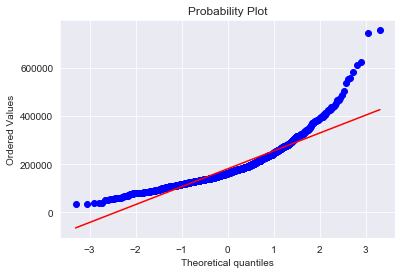

In [155]:
#SalePrice is the variable we need to predict. So let's do some analysis on this variable first.
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



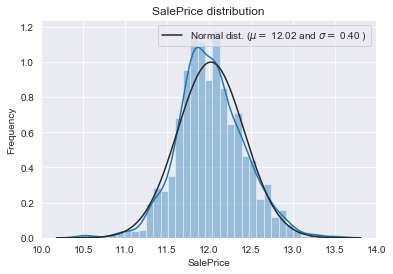

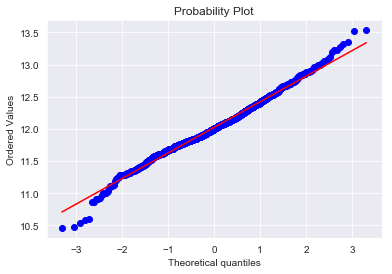

In [156]:
#The target variable is right skewed. As (linear) models love normally distributed data , 
#we need to transform this variable and make it more normally distributed.
#Log-transformation of the target variable
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column

train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

## Data Processing 

In [157]:
#Outliers
#Documentation for the Ames Housing Data indicates that there are outliers present in the training data
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.000,56.897,42.301,20.000,20.000,50.000,70.000,190.000
LotFrontage,1201.000,70.050,24.285,21.000,59.000,69.000,80.000,313.000
LotArea,1460.000,10516.828,9981.265,1300.000,7553.500,9478.500,11601.500,215245.000
OverallQual,1460.000,6.099,1.383,1.000,5.000,6.000,7.000,10.000
OverallCond,1460.000,5.575,1.113,1.000,5.000,5.000,6.000,9.000
YearBuilt,1460.000,1971.268,30.203,1872.000,1954.000,1973.000,2000.000,2010.000
YearRemodAdd,1460.000,1984.866,20.645,1950.000,1967.000,1994.000,2004.000,2010.000
MasVnrArea,1452.000,103.685,181.066,0.000,0.000,0.000,166.000,1600.000
BsmtFinSF1,1460.000,443.640,456.098,0.000,0.000,383.500,712.250,5644.000
BsmtFinSF2,1460.000,46.549,161.319,0.000,0.000,0.000,0.000,1474.000


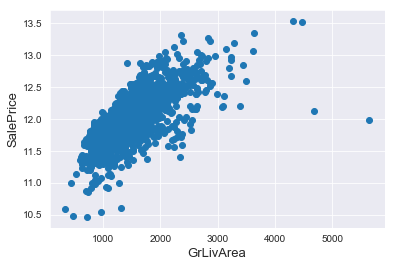

In [158]:
#Let's explore these outliers

fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

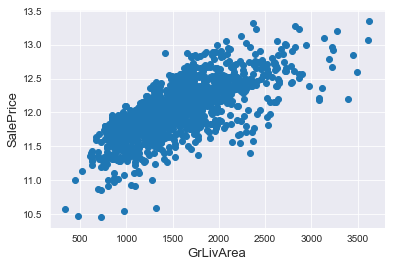

In [159]:
#We can see at the bottom right two with extremely large GrLivArea that are of a low price. 
#These values are huge oultliers. Therefore, we can safely delete them.
#Deleting outliers

train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

### Note :
Outliers removal is not always safe. We decided to delete these two as they are very huge and really bad ( extremely large areas for very low prices).
There are probably others outliers in the training data. However, removing all them may affect badly our models if ever there were also outliers in the test data. That's why , instead of removing them all, we will just manage to make some of our models robust on them. You can refer to the modelling part of this notebook for that.

### Features engineering

In [160]:
#let's first concatenate the train and test data in the same dataframe

ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
df_combined = pd.concat((train, test)).reset_index(drop=True)
df_combined.drop(['SalePrice'], axis=1, inplace=True)
print("df_combined size is : {}".format(df_combined.shape))

df_combined size is : (2915, 79)


In [161]:
#Handling Missing Data

df_combined_na = (df_combined.isnull().sum() / len(df_combined)) * 100
df_combined_na = df_combined_na.drop(df_combined_na[df_combined_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_combined_na})
missing_data.head(30)

,Missing Ratio
PoolQC,99.726
MiscFeature,96.398
Alley,93.208
Fence,80.446
FireplaceQu,48.714
LotFrontage,16.672
GarageQual,5.455
GarageCond,5.455
GarageFinish,5.455
GarageYrBlt,5.455


Text(0.5, 1.0, 'Percent missing data by feature')

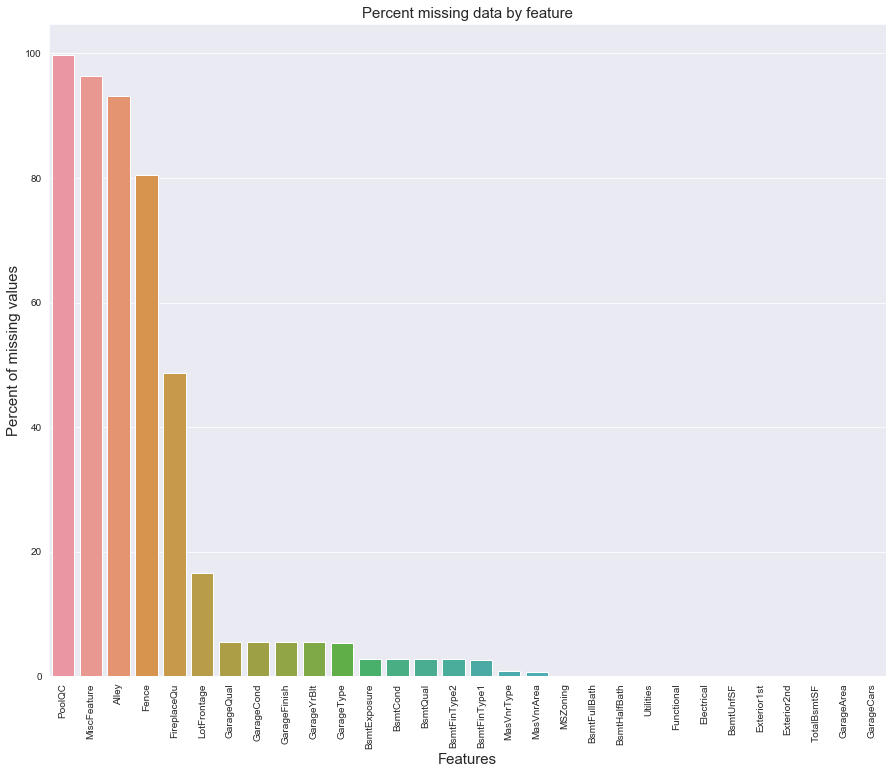

In [162]:
# plotting the missing data 

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=df_combined_na.index, y=df_combined_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

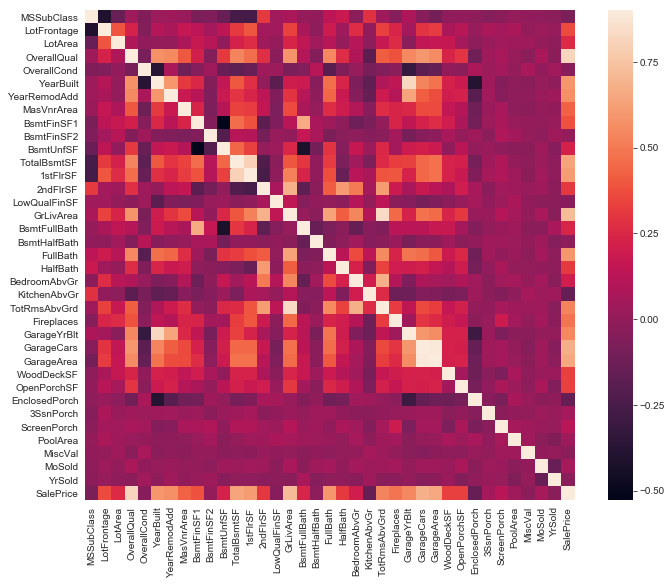

In [163]:
#Correlation map to see how features are correlated with SalePrice

corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
plt.show()

In [164]:
#Imputing missing values
# Using for loop to fill each category based data description

for col in ('PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish',
           'GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
           'MasVnrType','MSSubClass'):
        df_combined[col].fillna('NA', inplace=True) 

In [165]:
for col in ('GarageYrBlt','GarageArea','GarageCars','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
             'TotalBsmtSF','BsmtFullBath','BsmtHalfBath','MasVnrArea'):
        df_combined[col].fillna(0, inplace=True) 

In [166]:
for col in ('MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd','SaleType','Functional','Utilities'):
        df_combined[col].fillna(df_combined[col].mode()[0], inplace=True) 

In [167]:
# Using .groupby and lambda expression to fill 'LotFrontage' column using 'Neighborhood 
df_combined['LotFrontage'] = df_combined.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [168]:
#Check remaining missing values if any 
df_combined_na = (df_combined.isnull().sum() / len(df_combined)) * 100
df_combined_na = df_combined_na.drop(df_combined_na[df_combined_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_combined_na})
missing_data.head(30)

,Missing Ratio


In [169]:
#Transforming some numerical variables that are really categorical
#MSSubClass = The building class
df_combined['MSSubClass'] = df_combined['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
df_combined['OverallCond'] = df_combined['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
df_combined['YrSold'] = df_combined['YrSold'].astype(str)
df_combined['MoSold'] = df_combined['MoSold'].astype(str)

In [170]:
#Label Encoding some categorical variables that may contain information in their ordering set
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df_combined[c].values)) 
    df_combined[c] = lbl.transform(list(df_combined[c].values))

# shape        
print('Shape df_combined: {}'.format(df_combined.shape))

Shape df_combined: (2915, 79)


In [171]:
# Adding total sqfootage feature 
df_combined['TotalSF'] = df_combined['TotalBsmtSF'] + df_combined['1stFlrSF'] + df_combined['2ndFlrSF']

In [172]:
#
numeric_feats = df_combined.dtypes[df_combined.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df_combined[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.932
PoolArea,18.702
LotArea,13.124
LowQualFinSF,12.080
3SsnPorch,11.368
LandSlope,4.971
KitchenAbvGr,4.299
BsmtFinSF2,4.143
EnclosedPorch,4.001
ScreenPorch,3.944


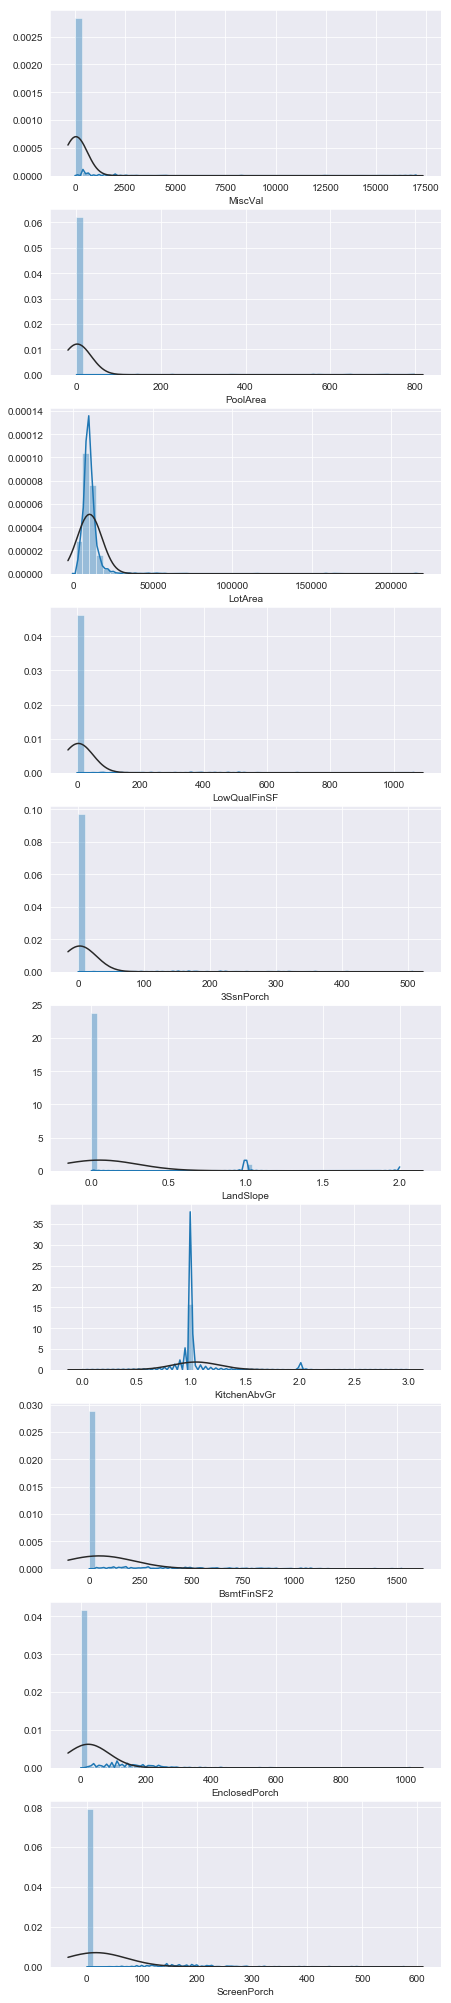

In [173]:
# Drawing  
f, (ax1,ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(10,figsize=(7,36))
sns.distplot(df_combined['MiscVal'], fit=norm, ax=ax1)
sns.distplot(df_combined['PoolArea'], fit=norm, ax=ax2)
sns.distplot(df_combined['LotArea'], fit=norm, ax=ax3)
sns.distplot(df_combined['LowQualFinSF'], fit=norm, ax=ax4)
sns.distplot(df_combined['3SsnPorch'], fit=norm, ax=ax5)
sns.distplot(df_combined['LandSlope'], fit=norm, ax=ax6)
sns.distplot(df_combined['KitchenAbvGr'], fit=norm, ax=ax7)
sns.distplot(df_combined['BsmtFinSF2'], fit=norm, ax=ax8)
sns.distplot(df_combined['EnclosedPorch'], fit=norm, ax=ax9)
sns.distplot(df_combined['ScreenPorch'], fit=norm, ax=ax10)

In [174]:
#Box Cox Transformation of (highly) skewed features
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df_combined[feat] += 1
    df_combined[feat] = boxcox1p(df_combined[feat], lam)
    
df_combined[skewed_features] = np.log1p(df_combined[skewed_features])

There are 59 skewed numerical features to Box Cox transform


In [175]:
#Getting dummy categorical features 
df_combined = pd.get_dummies(df_combined, drop_first=True)
print(df_combined.shape)

(2915, 202)


In [176]:
#Getting the new train and test sets.
df_train = df_combined[:ntrain]
df_test = df_combined[ntrain:]

## Modelling 

In [177]:
#Import librairies
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import time
from sklearn.neighbors import KNeighborsRegressor

In [178]:
X_train = df_train.values

In [179]:
X_test = df_test.values

In [180]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

## Base Models

In [181]:
#LASSO Regression 
#This model may be very sensitive to outliers. So we need to made it more robust on them. 
#For that we use the sklearn's Robustscaler() method on pipeline
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [182]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1151 (0.0065)



In [183]:
#ENet Regression
# Again made robust to outliers
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [200]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1150 (0.0066)



In [201]:
score

array([0.10891614, 0.1207574 , 0.12506029, 0.10974928, 0.11060394])

In [185]:
#define a rmsle evaluation function
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [186]:
lasso.fit(X_train, y_train)
lasso_train_pred = lasso.predict(X_train)
lasso_pred = np.expm1(lasso.predict(X_test))
print(rmsle(y_train, lasso_train_pred))

0.10625809535106057


In [187]:
#Test Submission
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = lasso_pred
sub.to_csv('submissionL.csv',index=False)

In [188]:
#The Kaggle Score for this Model is 0.122

## Fine_Tuned Models

In [189]:
#Random Forest Regression using RandomizedSearchCV
rfr = RandomForestRegressor(criterion='mse', bootstrap=True, random_state=0, n_jobs=2)

param_dist = dict(n_estimators=list(range(1,100)),
                  max_depth=list(range(1,100)),
                  min_samples_leaf=list(range(1,10)))

rand = RandomizedSearchCV(rfr, param_dist, cv=10, verbose=1, n_iter=30)
rand.fit(X_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  3.5min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=2,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=30, n_jobs=None,
          param_distributions={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,...7, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
          pre_dispatch='2*n_jobs', random_state=None, refi

In [190]:
rand.best_score_ # RandomizedSearchCV

0.8779567021828524

In [191]:
best_rfr = rand.best_estimator_

In [192]:
best_rfr.score(X_train,y_train) # RandomForestRegressor

0.9666003540784429

In [193]:
rfr_train_pred = best_rfr.predict(X_train)
rfr_pred = np.expm1(best_rfr.predict(X_test))
print(rmsle(y_train, rfr_train_pred))

0.07236051301465923


In [194]:
#Test Submission
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = rfr_pred
sub.to_csv('submissionRR.csv',index=False)

## Boston house price dictionary
|Feature|Score|
|---|---|
|**LASSO Regression**|*0.1151*|
|**Elastic Net**|0.1150|
|**RandomForestRegressor**|*0.9666*|
|**RandomizedSearchCV**|*0.8779567*|
